# Hälsostudie

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)

### Del 1 - Läs in fil + hälsokontroll

- Skriver ut de fem första raderna för att få en överblick av datan
- Skriver ut info för att se vilka datatyper samt om vi har några NaN-värden vi behöver hantera, vilket vi inte har i detta fall
- Skriver ut describe för att få en snabb överblick av medel, std, max och min.
- Avslutar med att se om det finns några dubbletter vi behöver hantera, vilket vi inte har i detta fall

In [12]:
data = pd.read_csv('data/health_study_dataset.csv')

display(data.head())
display(data.info())
display(data.describe())
print(data.duplicated().any())

,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


None

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,49.426250,171.849250,73.413000,149.178625,4.929150,0.058750
std,231.0844,14.501118,9.804259,13.685059,12.793360,0.848413,0.235303
min,1.0000,18.000000,144.400000,33.700000,106.800000,2.500000,0.000000
25%,200.7500,39.000000,164.775000,64.800000,140.900000,4.327500,0.000000
50%,400.5000,50.000000,171.350000,73.200000,149.400000,4.970000,0.000000
75%,600.2500,59.000000,178.925000,82.600000,157.600000,5.482500,0.000000
max,800.0000,90.000000,200.400000,114.400000,185.900000,7.880000,1.000000


False


### Del 2 - Beskrivande analys
- Räkna ut medel, median, min och max för: age, weight, height, systolic_bp, cholesterol.
- Skapa minst 3 olika grafer 

In [ ]:
selected_columns = ['age', 'weight', 'height', 'systolic_bp', 'cholesterol']
summary = data[selected_columns].agg(['mean', 'median', 'min', 'max'])
display(summary)

,age,weight,height,systolic_bp,cholesterol
mean,49.42625,73.413,171.84925,149.178625,4.92915
median,50.00000,73.200,171.35000,149.400000,4.97000
min,18.00000,33.700,144.40000,106.800000,2.50000
max,90.00000,114.400,200.40000,185.900000,7.88000


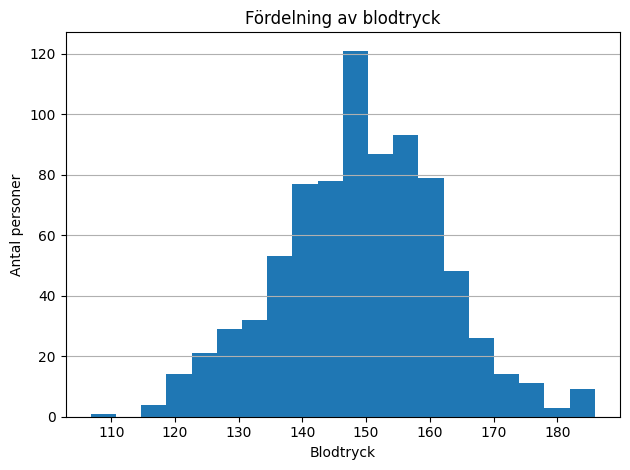

In [39]:
fig, ax = plt.subplots()
ax.hist(data['systolic_bp'], bins=20)
ax.set_title('Fördelning av blodtryck')
ax.set_xlabel('Blodtryck')
ax.set_ylabel( 'Antal personer')
ax.grid(True, axis='y')
plt.tight_layout()

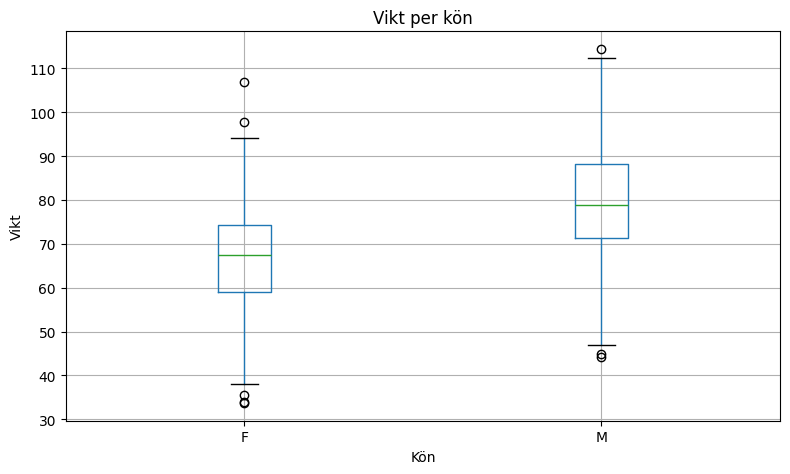

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
data.boxplot(column='weight', by='sex', ax=ax)
ax.set_title('Viktfördelning per kön')
ax.set_xlabel('Kön')
ax.set_ylabel('Vikt (kg)')
plt.suptitle('')
plt.tight_layout()

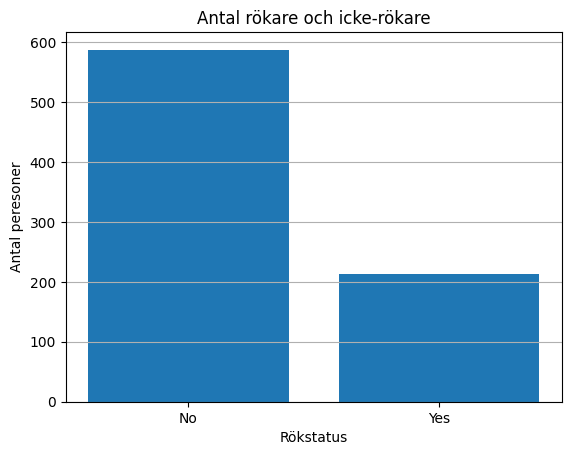

In [33]:
count_smoker = data['smoker'].value_counts()
fig, ax = plt.subplots()
ax.bar(count_smoker.index, count_smoker.values)
ax.set_title('Antal rökare och icke-rökare')
ax.set_xlabel('Rökstatus')
ax.set_ylabel('Antal peresoner')
ax.grid(True, axis='y')


## Del 3 - Simulering kopplad till caset

In [59]:
num_sick = data['disease'].sum()                    # Räknar anatl sjuka
num_healthy =(data['disease'] == 0).sum()           # Räknar antal friska
pct_sick = round((data['disease'].mean() * 100),2)  # Då den totala summan av columnen blir samma som antalet sjuka kan vi ta medelvärdet av hela kolumnen. * med 100 för att få %
pct_healthy = 100 - pct_sick                        # Räknar ut andelen friska

print(f'Antal sjuka: {num_sick}\nAntal friska: {num_healthy}\nAndel sjuka: {pct_sick} %\nAndel friska: {pct_healthy} %')




Antal sjuka: 47
Antal friska: 753
Andel sjuka: 5.88 %
Andel friska: 94.12 %
